# Statistics for Engineers

Warning: This is write-only code for illustration purposes. Use at your own risk.

In [4]:
!pip install tabulate hdrhistogram tdigest

You are using pip version 19.0.3, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
%run prelude.py

# Summary Statistics

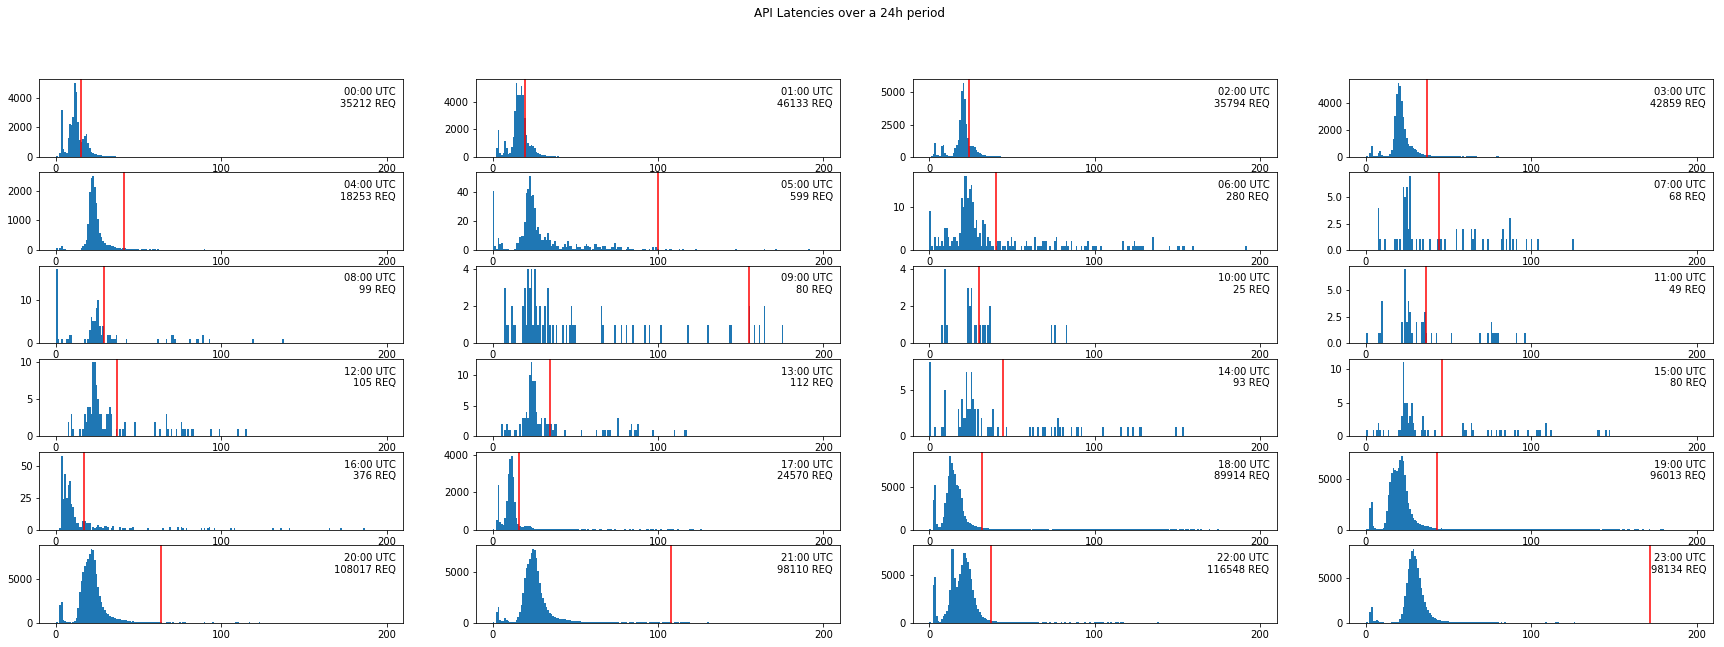

In [6]:
# Import dataset
XAL = np.genfromtxt("../datasets/api_latencies_24x1h.tsv", delimiter="\t")
XLST = []
for i in range(24):
    XLST.append(XAL[XAL[:,0] == i, 1])

H("Mean Latencies")
plt.figure(figsize=(30,10))
plt.suptitle("API Latencies over a 24h period")
ax1 =  plt.subplot(6, 4, 1)
# ax1.set_xticks([])
ax1.set_xticks([0,100,200])
ax1.tick_params(direction="in")
for i in range(24):
    X = XAL[XAL[:,0] == i, 1] # SELECT latency FROM XAL WHERE h = i
    p = np.mean(X)
    ax = plt.subplot(6, 4, i+1, sharex=ax1)
    ax.hist(X, bins=np.linspace(0, 200, 200));
    plt.text(0.98, 0.9, '{:02d}:00 UTC\n{} REQ'.format(i, len(X)), horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)
    ax.axvline(p, color="red")
    

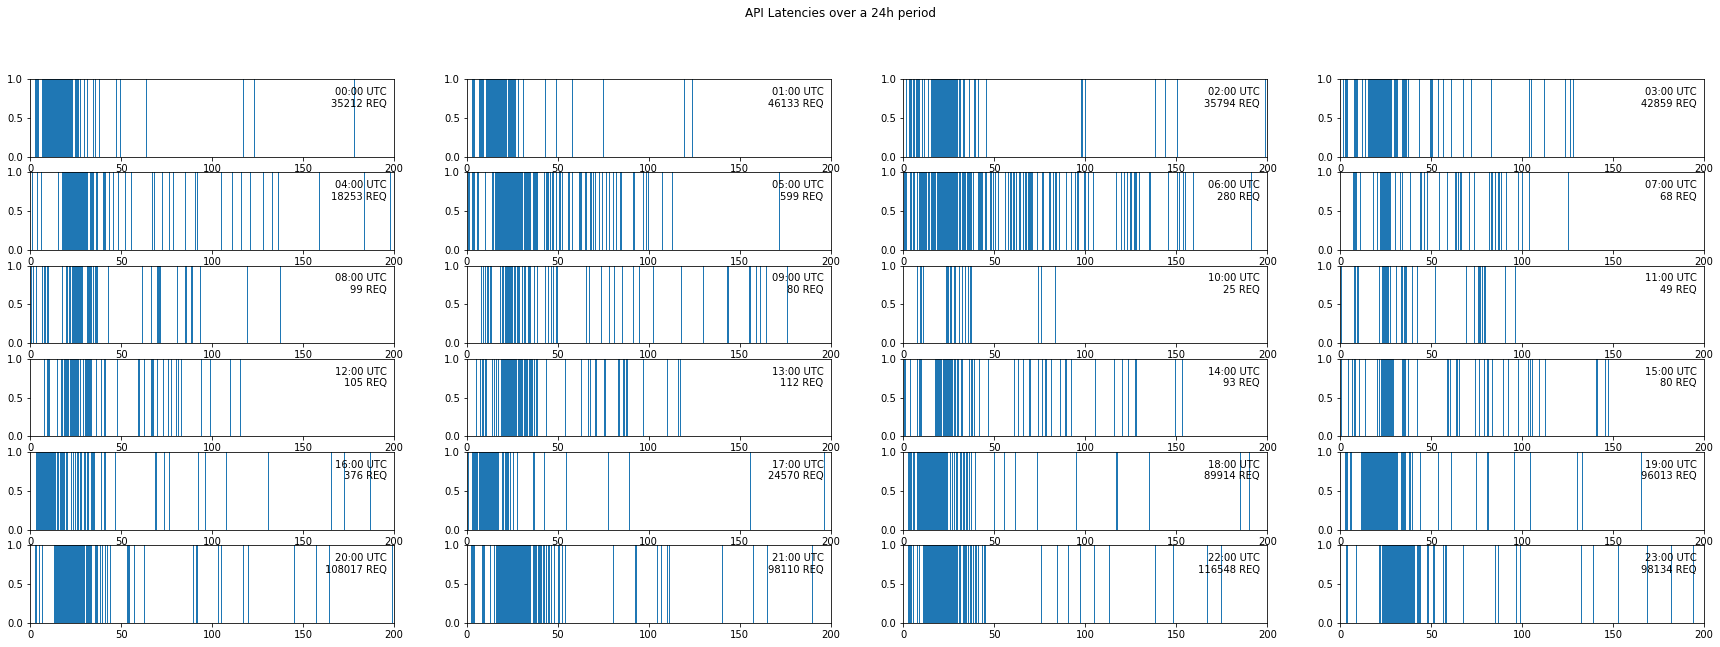

In [7]:
# Import dataset
XAL = np.genfromtxt("../datasets/api_latencies_24x1h.tsv", delimiter="\t")
XLST = []
for i in range(24):
    XLST.append(XAL[XAL[:,0] == i, 1])

def prep(X):
    N = 300
    if len(X) > N:
        return [ X[np.random.randint(0, len(X))] for _ in range(N) ]
    else:
        return X
    
plt.figure(figsize=(30,10))
plt.suptitle("API Latencies over a 24h period")
ax1 =  plt.subplot(6, 4, 1)
ax1.set_xticks([0, 50, 100, 150, 200])
ax1.set_xlim(0,200)
ax1.tick_params(direction="in")
for i in range(24):
    X = XAL[XAL[:,0] == i, 1] # SELECT latency FROM XAL WHERE h = i
    ax = plt.subplot(6, 4, i+1, sharex=ax1)
    sns.rugplot(prep(X), ax=ax, height=1)
    ax1.set_xlim(0,200)
    plt.text(0.98, 0.9, '{:02d}:00 UTC\n{} REQ'.format(i, len(X)), horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)

(0, 300)

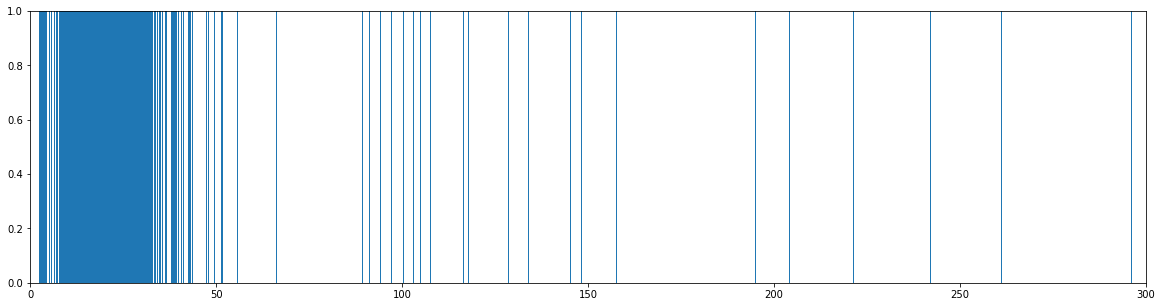

In [19]:
def nsample(X, N):
    X = np.array(X)
    p = N / float(len(X))
    return X[ np.random.rand(len(X)) < p ]

X = nsample(XAL[:, 1], 800)

sns.rugplot(X, height=1)
plt.xlim(0,300)

(0, 314.99999999999994)

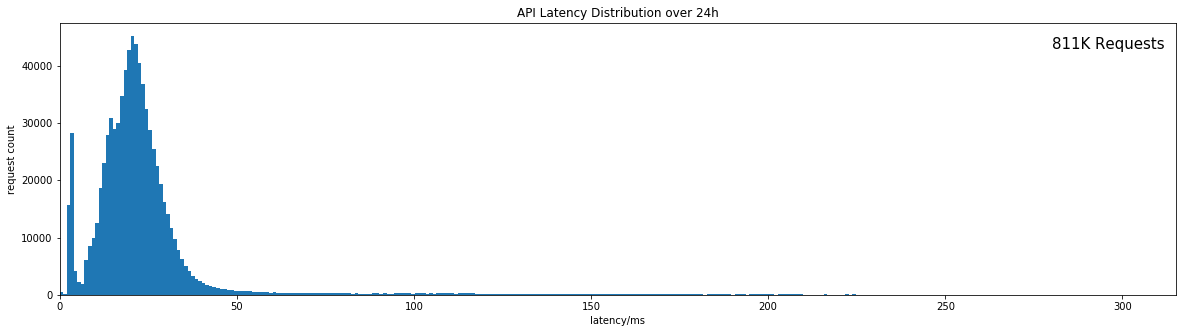

In [8]:
X = XAL[:, 1]
p = np.percentile(X, 90)

p_avg = np.mean([ np.percentile(XAL[XAL[:,0] == i, 1], 90) for i in range(24)])

plt.figure(figsize=(20,5))
ax = plt.subplot(1,1,1)
ax.set_title("API Latency Distribution over 24h")
ax.hist(X, bins=np.linspace(0, 300, 300));
ax.text(0.99, 0.95, '811K Requests'.format(len(X)), horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=15)

# ax.axvline(p, color="red")
# ax.text(p+3, 45000, 'p90\n{:.1f}ms'.format(p), horizontalalignment='left', verticalalignment='top', fontsize=15)

# ax.axvline(p_avg, color="blue")
# ax.text(p_avg+3, 45000, 'avgeraged p90\n{:.1f}ms  ({:.1f}% error)'.format(p_avg, 100*abs(p_avg-p)/p), horizontalalignment='left', verticalalignment='top', fontsize=15, )
ax.set_xlabel("latency/ms")
ax.set_ylabel("request count")
ax.set_xlim(0)

In [ ]:
X = XAL[:, 1]
p = np.percentile(X, 90)

p_avg = np.mean([ np.percentile(XAL[XAL[:,0] == i, 1], 90) for i in range(24)])

plt.figure(figsize=(20,5))
ax = plt.subplot(1,1,1)
ax.set_title("API Latency Distribution over 24h")
ax.hist(X, bins=np.linspace(0, 300, 300));
ax.text(0.99, 0.95, '811K Requests'.format(len(X)), horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=15)

# ax.axvline(p, color="red")
# ax.text(p+3, 45000, 'p90\n{:.1f}ms'.format(p), horizontalalignment='left', verticalalignment='top', fontsize=15)

# ax.axvline(p_avg, color="blue")
# ax.text(p_avg+3, 45000, 'avgeraged p90\n{:.1f}ms  ({:.1f}% error)'.format(p_avg, 100*abs(p_avg-p)/p), horizontalalignment='left', verticalalignment='top', fontsize=15, )
ax.set_xlabel("latency/ms")
ax.set_ylabel("request count")
ax.set_xlim(0)

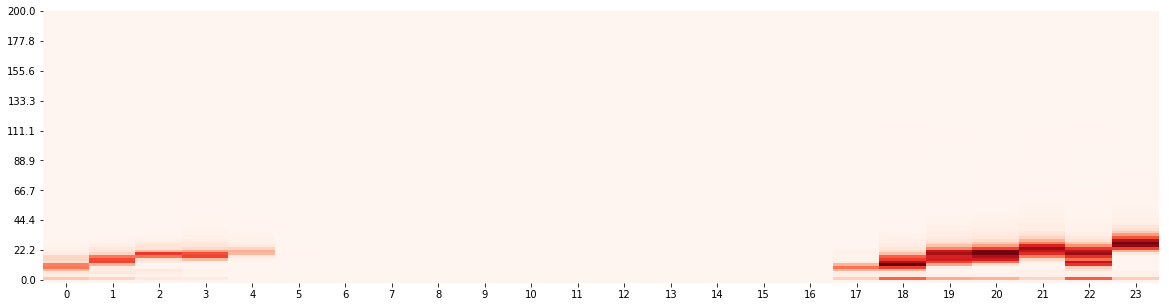

In [9]:
H("24x API Latencies")
FILENAME="../datasets/api_latencies_24x1h.tsv"
XAL = defaultdict(list)
with open(FILENAME) as fh:
    for line in fh:
        # line = "3 232.123321" -- hour latency
        a, b = line.split("\t")
        XAL[int(a)].append(float(b))

%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import math

MIN = 0
MAX = 200
STEPS = 100

def idx(y):
    if y <= MIN: return None
    if y >= MAX: return None
    return STEPS - math.floor(y / float(MAX - MIN) * STEPS ) - 1

data = np.zeros(STEPS*24).reshape(STEPS,24)

for h,X in XAL.items():
    for x in X:
        y = idx(x)
        if y:
            data[y, h] += 3

plt.figure(figsize=(20,5))
ax = sns.heatmap(data, cmap='Reds', cbar=False)
plt.yticks(np.arange(0, STEPS, 11), [ "{:.1f}".format(x) for x in np.linspace(MAX, MIN, math.floor(STEPS/10))])
# ax.set_yticks([])
# ax2 = ax.twinx()
# ax2.plot( np.arange(24) + 0.5,  [ np.mean(X) for _, X in XAL.items() ], ".-", color="gray", )
# ax2.set_ylim(0,MAX)
plt.show()

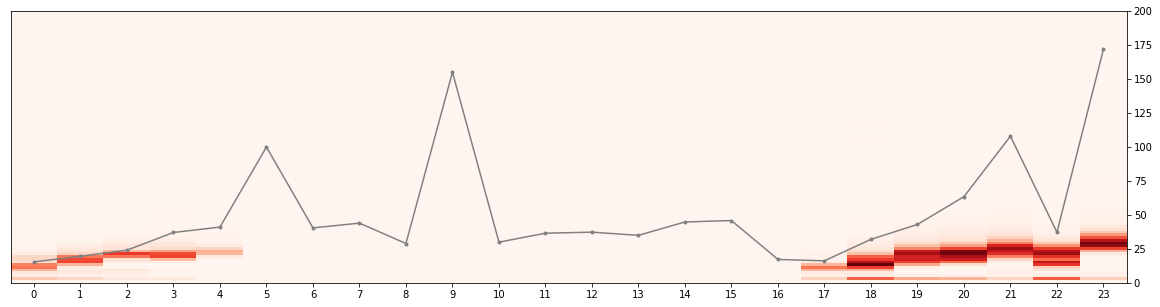

In [10]:
H("24x API Latencies")
FILENAME="../datasets/api_latencies_24x1h.tsv"
XAL = defaultdict(list)
with open(FILENAME) as fh:
    for line in fh:
        # line = "3 232.123321" -- hour latency
        a, b = line.split("\t")
        XAL[int(a)].append(float(b))

%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import math

MIN = 0
MAX = 200
STEPS = 100

def idx(y):
    if y <= MIN: return None
    if y >= MAX: return None
    return STEPS - math.floor(y / float(MAX - MIN) * STEPS ) - 1

data = np.zeros(STEPS*24).reshape(STEPS,24)

for h,X in XAL.items():
    for x in X:
        y = idx(x)
        if y:
            data[y, h] += 3

plt.figure(figsize=(20,5))
ax = sns.heatmap(data, cmap='Reds', cbar=False)
ax.set_yticks([])
ax2 = ax.twinx()
ax2.plot( np.arange(24) + 0.5,  [ np.mean(X) for _, X in XAL.items() ], ".-", color="gray", )
ax2.set_ylim(0,MAX)
# plt.yticks(np.arange(0, STEPS, 11), [ "{:.1f}".format(x) for x in np.linspace(MAX, MIN, math.floor(STEPS/10))])
plt.show()

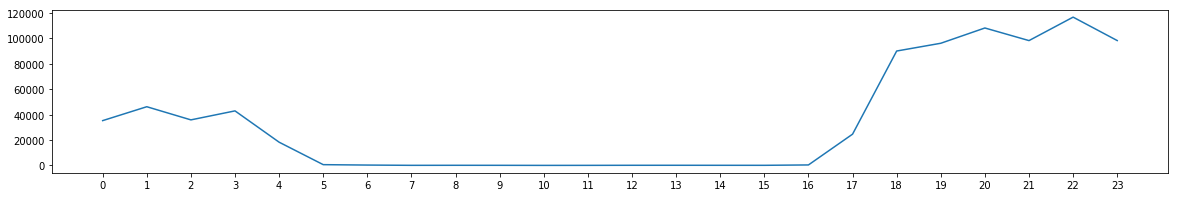

In [12]:
XAL = np.genfromtxt("../datasets/api_latencies_24x1h.tsv", delimiter="\t")
XLST = []
for i in range(24):
    XLST.append(XAL[XAL[:,0] == i, 1])

H("Request Rates")

plt.figure(figsize=(20,3))
plt.plot([len(r) for r in XLST ])
plt.xticks(np.arange(24))
plt.yscale("linear")
plt.show()

# Percentiles


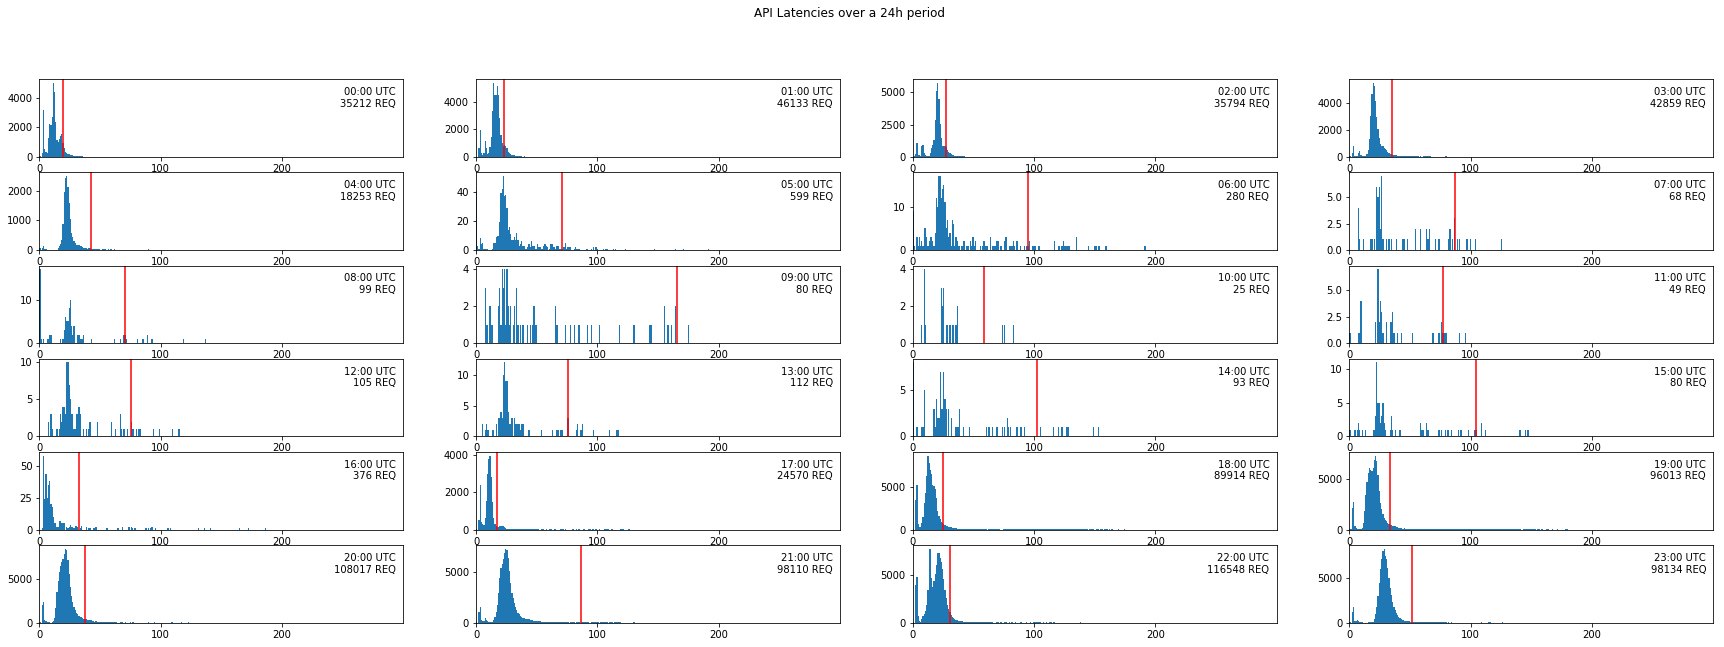

In [14]:
# Import dataset
XAL = np.genfromtxt("../datasets/api_latencies_24x1h.tsv", delimiter="\t")
XLST = []
for i in range(24):
    XLST.append(XAL[XAL[:,0] == i, 1])

plt.figure(figsize=(30,10))
plt.suptitle("API Latencies over a 24h period")
ax1 =  plt.subplot(6, 4, 1)
# ax1.set_xticks([])
ax1.set_xticks([0,100,200])
ax1.tick_params(direction="in")
for i in range(24):
    X = XAL[XAL[:,0] == i, 1] # SELECT latency FROM XAL WHERE h = i
    ax = plt.subplot(6, 4, i+1, sharex=ax1)
    ax.hist(X, bins=np.linspace(0, 200, 200));
    plt.text(0.98, 0.9, '{:02d}:00 UTC\n{} REQ'.format(i, len(X)), horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)
    ax.axvline(np.percentile(X, 90), color="red")
    # ax.axvline(np.percentile(X, 90), color="#555555")
    # ax.axvline(np.percentile(X, 95), color="#777777")
    # ax.axvline(np.percentile(X, 99), color="#999999")
    ax.set_xlim(0,300)



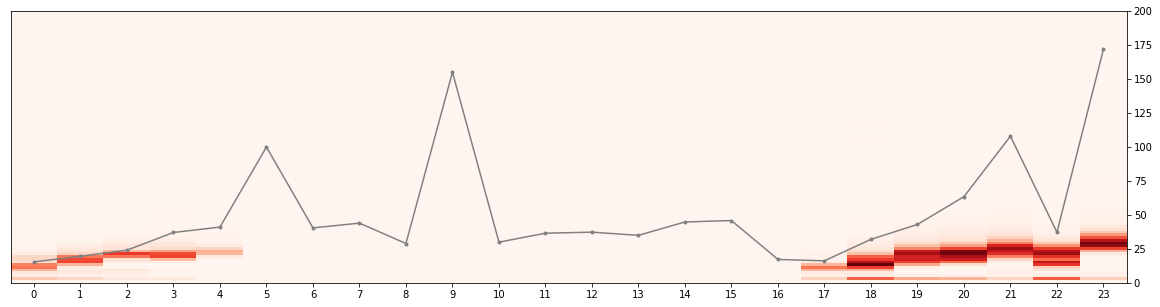

In [20]:
H("24x API Latencies")
FILENAME="../datasets/api_latencies_24x1h.tsv"
XAL = defaultdict(list)
with open(FILENAME) as fh:
    for line in fh:
        # line = "3 232.123321" -- hour latency
        a, b = line.split("\t")
        XAL[int(a)].append(float(b))

%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import math

MIN = 0
MAX = 200
STEPS = 100

def idx(y):
    if y <= MIN: return None
    if y >= MAX: return None
    return STEPS - math.floor(y / float(MAX - MIN) * STEPS ) - 1

data = np.zeros(STEPS*24).reshape(STEPS,24)

for h,X in XAL.items():
    for x in X:
        y = idx(x)
        if y:
            data[y, h] += 3

plt.figure(figsize=(20,5))
ax = sns.heatmap(data, cmap='Reds', cbar=False)
ax.set_yticks([])
ax2 = ax.twinx()
ax2.plot( np.arange(24) + 0.5,  [ np.mean(X) for _, X in XAL.items() ], ".-", color="gray", )
ax2.set_ylim(0,MAX)
# plt.yticks(np.arange(0, STEPS, 11), [ "{:.1f}".format(x) for x in np.linspace(MAX, MIN, math.floor(STEPS/10))])
plt.show()

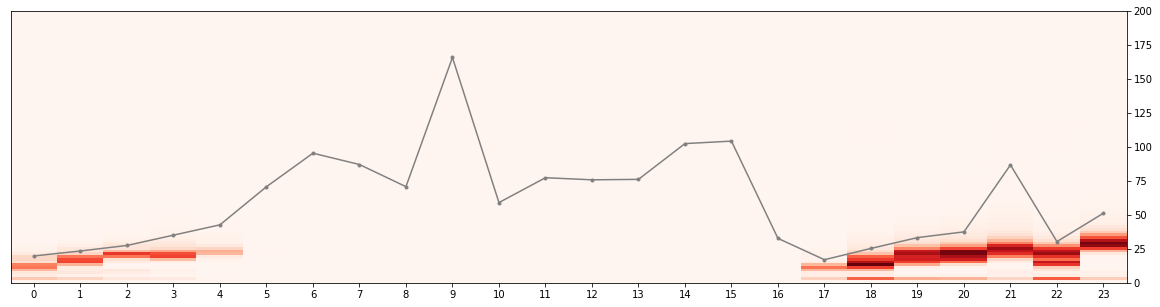

In [24]:
H("24x API Latencies")
FILENAME="../datasets/api_latencies_24x1h.tsv"
XAL = defaultdict(list)
with open(FILENAME) as fh:
    for line in fh:
        # line = "3 232.123321" -- hour latency
        a, b = line.split("\t")
        XAL[int(a)].append(float(b))

%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import math

MIN = 0
MAX = 200
STEPS = 100

def idx(y):
    if y <= MIN: return None
    if y >= MAX: return None
    return STEPS - math.floor(y / float(MAX - MIN) * STEPS ) - 1

data = np.zeros(STEPS*24).reshape(STEPS,24)

for h,X in XAL.items():
    for x in X:
        y = idx(x)
        if y:
            data[y, h] += 3

plt.figure(figsize=(20,5))
ax = sns.heatmap(data, cmap='Reds', cbar=False)
ax.set_yticks([])
ax2 = ax.twinx()
ax2.plot( np.arange(24) + 0.5,  [ np.percentile(X,90) for _, X in XAL.items() ], ".-", color="gray", )
ax2.set_ylim(0,MAX)
# plt.yticks(np.arange(0, STEPS, 11), [ "{:.1f}".format(x) for x in np.linspace(MAX, MIN, math.floor(STEPS/10))])
plt.show()

(0, 210.0)

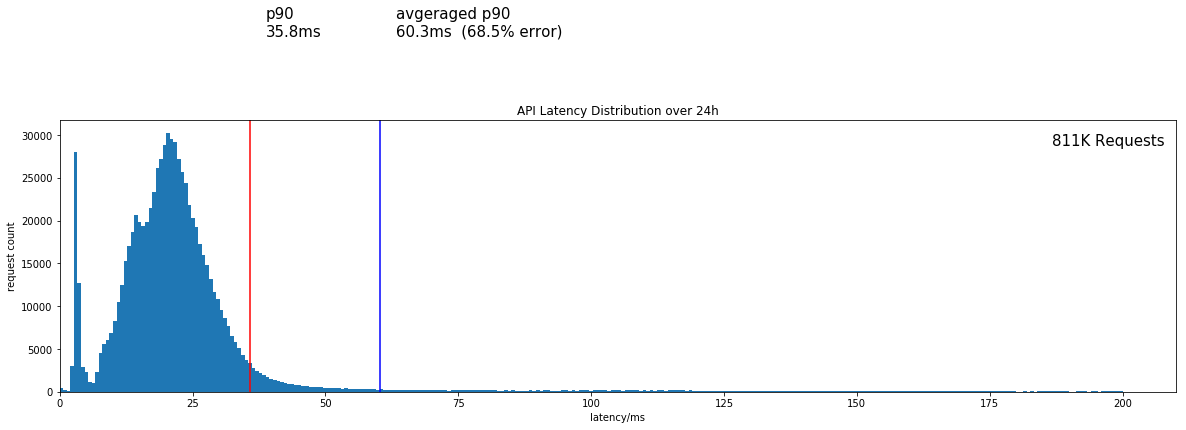

In [13]:
# Import dataset
XAL = np.genfromtxt("../datasets/api_latencies_24x1h.tsv", delimiter="\t")
XLST = []
for i in range(24):
    XLST.append(XAL[XAL[:,0] == i, 1])

X = XAL[:, 1]
p = np.percentile(X, 90)

p_avg = np.mean([ np.percentile(XAL[XAL[:,0] == i, 1], 90) for i in range(24)])

plt.figure(figsize=(20,5))
ax = plt.subplot(1,1,1)
ax.set_title("API Latency Distribution over 24h")
ax.hist(X, bins=np.linspace(0, 200, 300));
ax.text(0.99, 0.95, '811K Requests'.format(len(X)), horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=15)

ax.axvline(p, color="red")
ax.text(p+3, 45000, 'p90\n{:.1f}ms'.format(p), horizontalalignment='left', verticalalignment='top', fontsize=15)

ax.axvline(p_avg, color="blue")
ax.text(p_avg+3, 45000, 'avgeraged p90\n{:.1f}ms  ({:.1f}% error)'.format(p_avg, 100*abs(p_avg-p)/p), horizontalalignment='left', verticalalignment='top', fontsize=15, )
ax.set_xlabel("latency/ms")
ax.set_ylabel("request count")
ax.set_xlim(0)

## Sampling

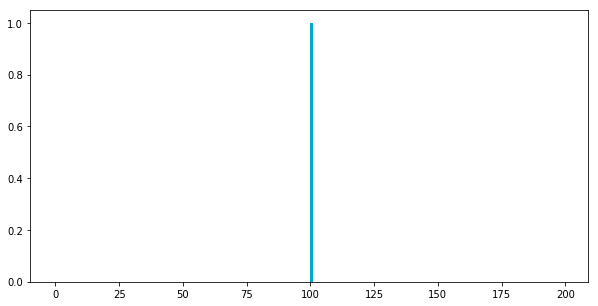

In [11]:
# import matplotlib as mpl
XWL = np.genfromtxt("../datasets/WebLatency.csv", delimiter=",")[:,2] - 85

def sample(X, p):
    X = np.array(X)
    return X[ np.random.rand(len(X)) < p ]

s = 10000
N = 100
X = np.arange(N)
S = []
p = 0.1
for _ in range(s):
    Y = sample(X, p)
    S.append(len(Y))
    
plt.figure(figsize=(10,5))
plt.hist([N],  bins=np.arange(0, N*2), color="#00a7c8ff");

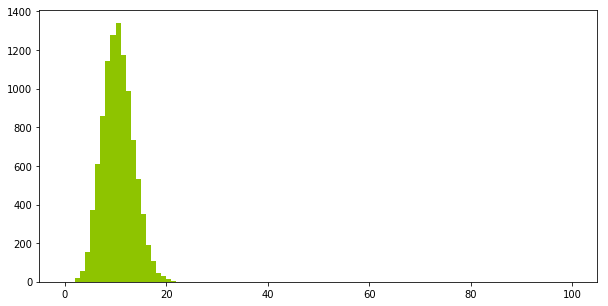

3.01865055281
3.0


In [16]:
plt.figure(figsize=(10,5))
plt.hist(S, bins=np.arange(0, math.ceil(N)+1), color="#8ec400ff");
# plt.hist([ np.random.binomial(N, p) for _ in range(s) ], bins=np.arange(0, 3*N*p), alpha=0.2)
plt.show()

print( np.std(S) )
print( np.sqrt( N * (1-p) * p ) )

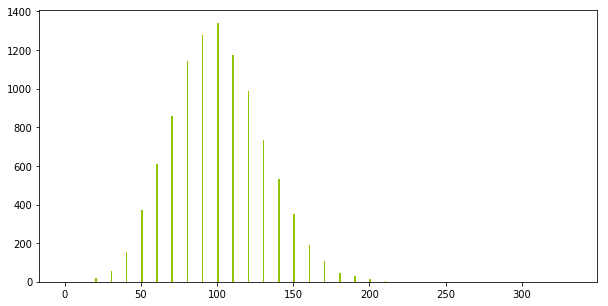

30.1865055281
30.0
0.3 %


In [17]:
T = np.array(S) / p
plt.figure(figsize=(10,5))
plt.hist(T, bins=np.arange(0, N/p/3), color="#8ec400ff");
plt.show()

print( np.std(T) )
print( np.sqrt( N * (1-p) / p ) )
print( np.sqrt( (1-p) / p / N ) , "%" )

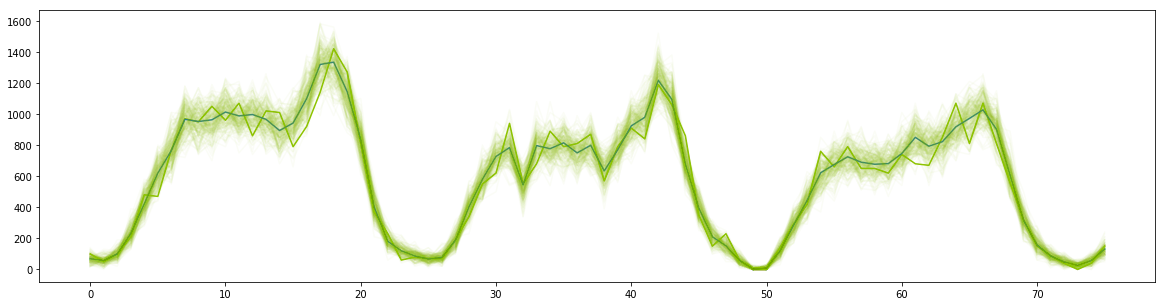

In [10]:
%run prelude.py
H("Request Rates")
XRR = np.loadtxt("../datasets/RequestRates.csv", delimiter=",")[:,1]

p = 0.1
def rsample(X, p):
    return [ np.random.binomial(x,p) / p for x in X]

X = (XRR - 720) / 1
X = np.floor(X)

plt.plot(rsample(X,p),alpha=1, color="#8ec400ff")
plt.plot(X)
s = 200
for _ in range(s):
    plt.plot(rsample(X,p),alpha=1/np.sqrt(s)/2, color="#8ec400ff")
    
plt.show()

30.0 %


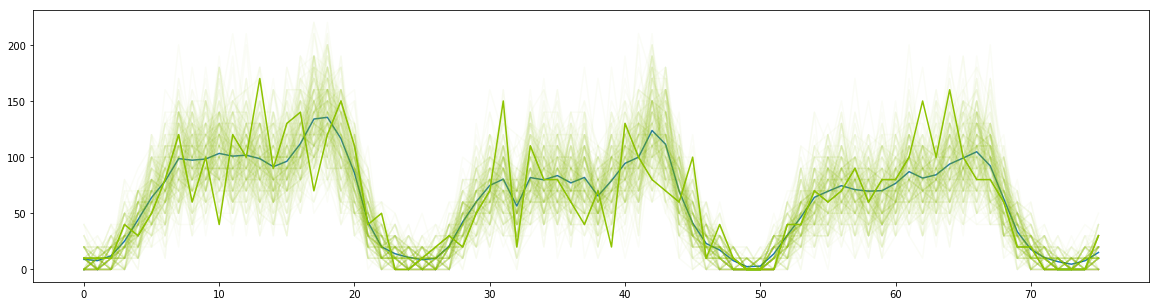

In [28]:
# Low RPS

X = (XRR - 700) / 10

# X = np.floor(X)

plt.plot(X)
plt.plot(rsample(X,p),alpha=1, color="#8ec400ff")
s = 200
for _ in range(s):
    plt.plot(rsample(X,p),alpha=1/np.sqrt(s)/2, color="#8ec400ff")
    
N = 100
p = 0.1
print( np.sqrt( (1-p) / p / N ) * 100 , "%" )

94.8683298051 %


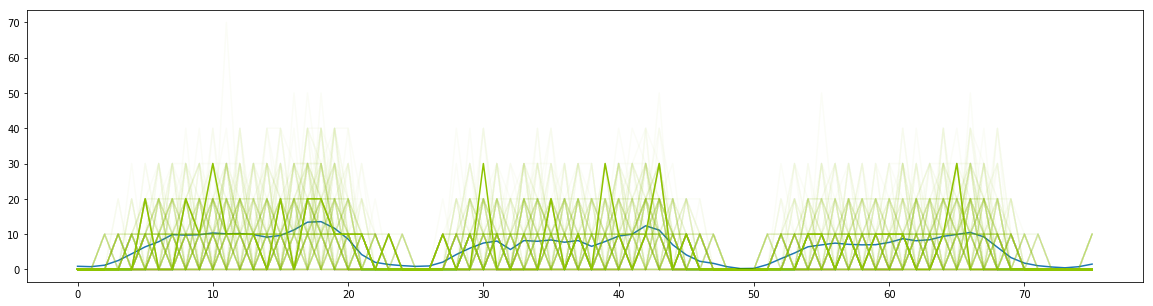

In [27]:
# Low RPS

X = (XRR - 700) / 100

# X = np.floor(X)

plt.plot(X)
plt.plot(rsample(X,p),alpha=1, color="#8ec400ff")
s = 200
for _ in range(s):
    plt.plot(rsample(X,p),alpha=1/np.sqrt(s)/2, color="#8ec400ff")
    
N = 10
p = 0.1
print( np.sqrt( (1-p) / p / N ) * 100 , "%" )

In [20]:
H("24x API Latencies")
FILENAME="../datasets/api_latencies_24x1h.tsv"
XAL = defaultdict(list)
with open(FILENAME) as fh:
    for line in fh:
        # line = "3 232.123321" -- hour latency
        a, b = line.split("\t")
        XAL[int(a)].append(float(b))

%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import math

MIN = 0
MAX = 200
STEPS = 100

def idx(y):
    if y <= MIN: return None
    if y >= MAX: return None
    return STEPS - math.floor(y / float(MAX - MIN) * STEPS ) - 1

data = np.zeros(STEPS*24).reshape(STEPS,24)

for h,X in XAL.items():
    for x in X:
        y = idx(x)
        if y:
            data[y, h] += 3

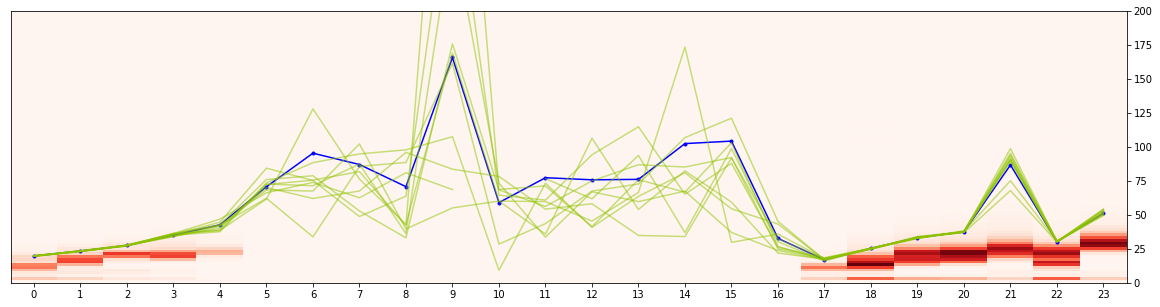

In [21]:
plt.figure(figsize=(20,5))

p = 0.1
def stat(X):
    if len(X) > 0:
        return np.percentile(X, 90)
    else:
        return None

ax = sns.heatmap(data, cmap='Reds', cbar=False)
ax.set_yticks([])
ax2 = ax.twinx()
ax2.plot( np.arange(24) + 0.5,  [ stat(X) for _, X in XAL.items() ], ".-", color="blue" )
for _ in range(10):
    ax2.plot( np.arange(24) + 0.5,  [ stat(sample(X, p)) for _, X in XAL.items() ], color="#8ec400ff", alpha=0.5 )
ax2.set_ylim(0,MAX)
plt.show()

(0, 4043.4898676675889)

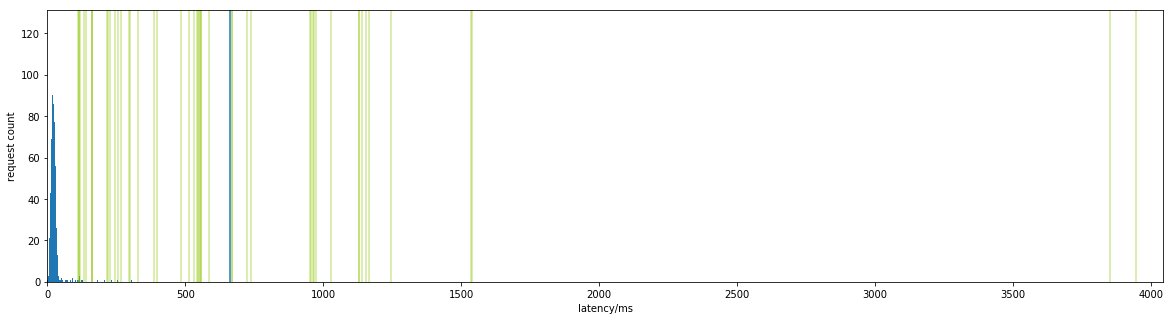

In [22]:
# Import dataset
XAL = np.genfromtxt("../datasets/api_latencies_24x1h.tsv", delimiter="\t")
X = XAL[:, 1]
X = np.random.choice(X, 1000)

plt.figure(figsize=(20,5))
ax = plt.subplot(1,1,1)
ax.hist(X, bins=np.linspace(0, 400, 200));


def stat(X):
    if len(X) > 0:
        return np.percentile(X, 99)
    else:
        return None


S = [ stat(sample(X, 0.1)) for _ in range(50) ]

for s in S:
    ax.axvline(s, color="#8ec400ff", alpha=0.4)

ax.axvline(stat(X))
    
ax.set_xlabel("latency/ms")
ax.set_ylabel("request count")
ax.set_xlim(0)

In [23]:
print(stat(X))
print(np.mean(S))
print(np.std(S) / np.mean(S) * 100)

664.129055499
725.653727247
104.253378543
